In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [75]:
from proj1_helpers import *
#data_folder = Path("../data/")
DATA_TRAIN_PATH = "../data/train.csv"
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Visualisation

In [39]:
import matplotlib.pyplot as plt

In [40]:
print(y)
# -1 c'est pour 'b' et 1 c'est pour 's'
print(np.shape(y))
print(np.shape(tX))
# On a donc 30 features et 25'000 data différentes

[ 1. -1. -1. ...  1. -1. -1.]
(250000,)
(250000, 30)


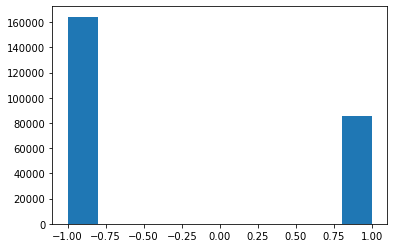

In [71]:
plt.hist(y)
plt.show()
# Plus de -1 que de 1 --> donc plus de 'b' que de 'c'

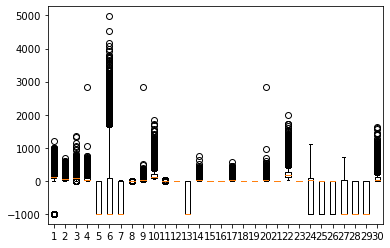

In [69]:
plt.boxplot(tX[:,])
plt.show()
# Certains features ont pas mal d'outliers, peut etre enlever les données avec des outliers vraiment loin

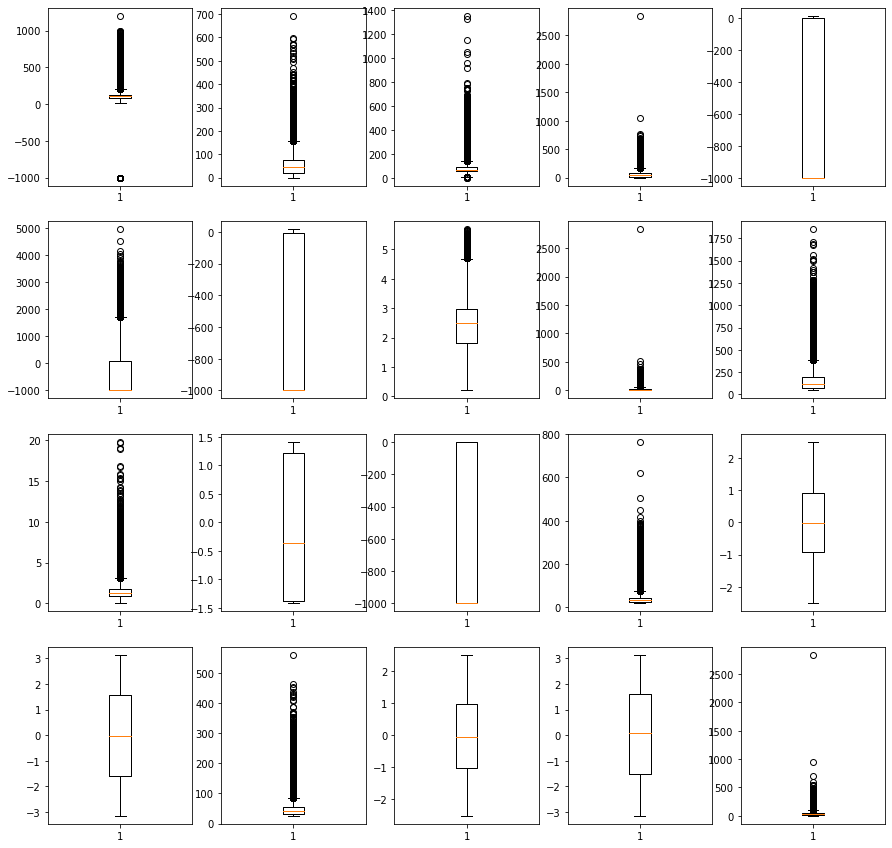

In [65]:
fig, axs = plt.subplots(4, 5, figsize=(15,15))

n = 0
for i in range(4) :
    for j in range(5) :
        axs[i,j].boxplot(tX[:,n])
        axs[i,j].set_title('')
        n = n + 1
plt.show()

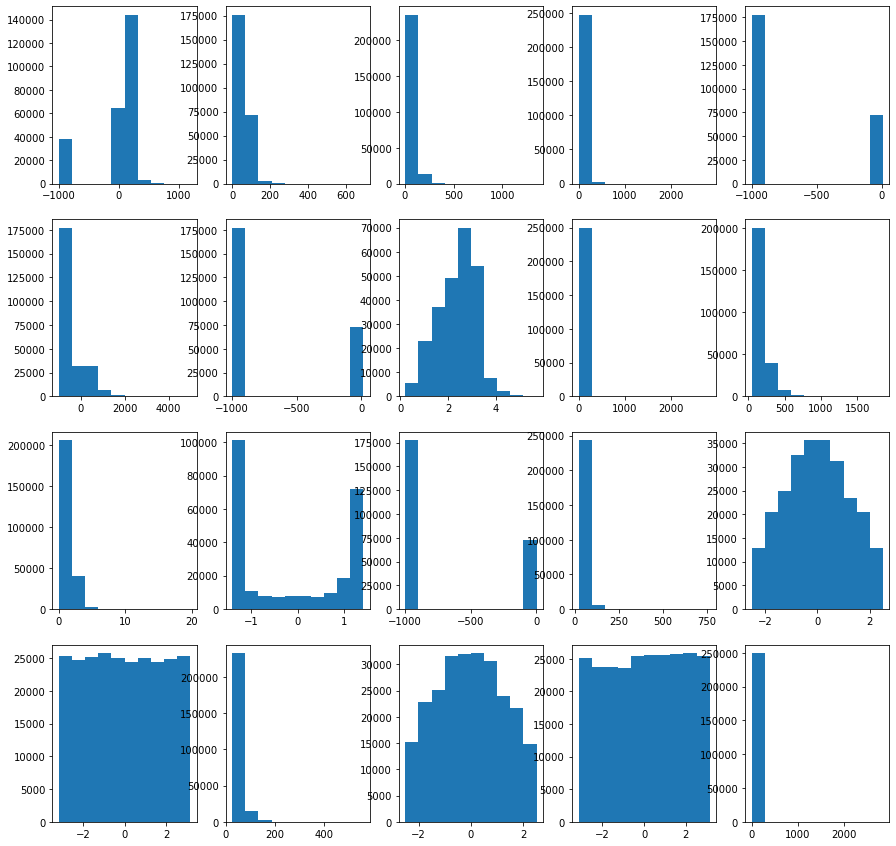

In [66]:
fig, axs = plt.subplots(4, 5, figsize=(15,15))

n = 0
for i in range(4) :
    for j in range(5) :
        axs[i,j].hist(tX[:,n])
        axs[i,j].set_title('')
        n = n + 1
plt.show()

# Les features 4 et 13 semblent etre très bizarres

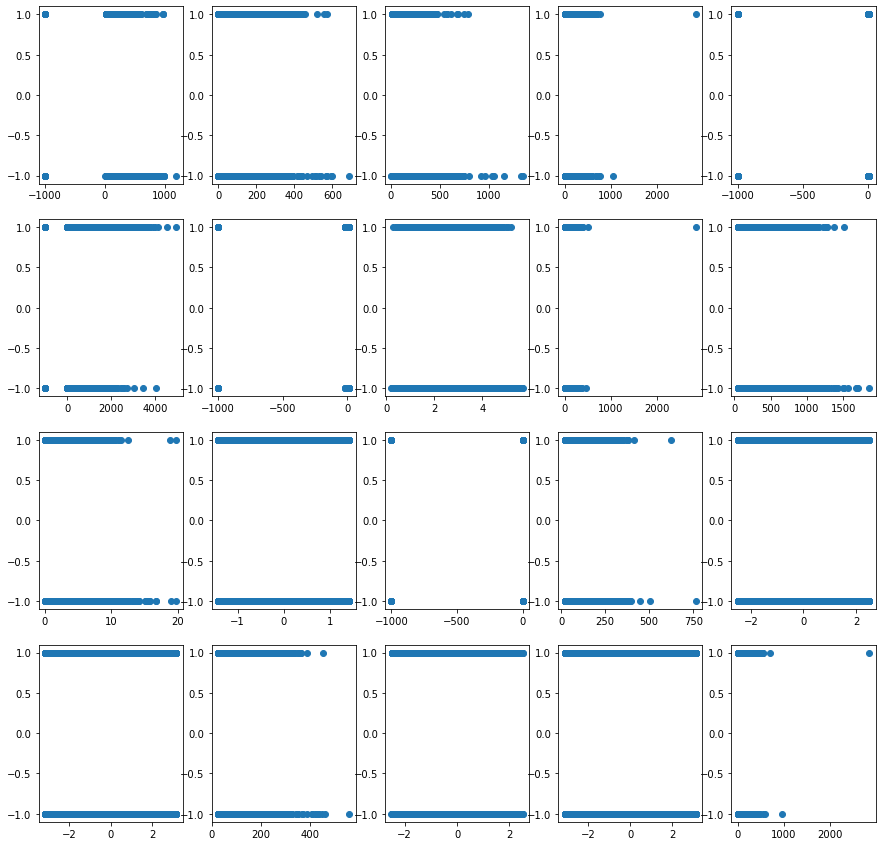

In [68]:
fig, axs = plt.subplots(4, 5, figsize=(15,15))

n = 0
for i in range(4) :
    for j in range(5) :
        axs[i,j].scatter(tX[:,n], y)
        axs[i,j].set_title('')
        n = n + 1
plt.show()

#meme constat feature 4 et 13 très bizarre --> peut être les enlever ??

In [72]:
import seaborn as sns# Create the default pairplot
sns.pairplot(tX)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

## Quelques essais avec les fonctions

In [10]:
from implementations import *

In [15]:
w_ls, loss_ls = least_squares(y, tX)
print("Least square weights {w} and loss {loss}".format(w=w_ls, loss=loss_ls))

Least square weights [ 8.03494349e-05 -7.20202266e-03 -6.05417274e-03 -5.47559077e-04
 -1.93874702e-02  4.73451615e-04 -2.60379061e-02  3.25106299e-01
 -3.80780008e-05 -2.72785897e+00 -2.21220141e-01  9.50794097e-02
  6.40351626e-02  2.73611865e+00 -3.31801110e-04 -9.54325152e-04
  2.74087539e+00 -5.34165279e-04  9.73498884e-04  3.69225050e-03
  3.54487165e-04 -5.43344617e-04 -3.30448034e-01 -1.40800496e-03
  8.31432874e-04  1.02117271e-03 -1.68047418e-03 -5.83664770e-03
 -1.11088005e-02  2.72831890e+00] and loss 0.3396868094770349


In [16]:
lambda_ = 0.2 
w_rr, loss_rr = ridge_regression(y, tX, lambda_)
print("Ridge regression weights {w} and loss {loss}".format(w=w_rr, loss=loss_rr))

Ridge regression weights [ 2.24104142e-04 -8.68280397e-03 -2.68859353e-03 -2.22470926e-03
 -5.48363092e-03  5.00183793e-04 -1.72285231e-02  6.05199540e-02
  1.57457370e-05  3.49522005e-03 -5.39186900e-02  6.84999623e-02
  2.19603319e-02  5.70895097e-03 -4.23536533e-04 -1.28871636e-03
  3.30152909e-03 -5.20781619e-04  9.12327144e-04  4.86026909e-03
  4.62605701e-04 -7.55206472e-04 -5.59287480e-02  1.20180623e-03
 -6.34079801e-04 -4.00651108e-04  5.73198500e-05  1.25042998e-03
 -8.49579242e-04 -5.51323579e-03] and loss 0.34835638582562173


In [76]:
max_iters = 50
gamma = 0.7
initial_w = np.zeros(tX.shape[1])
w_gd, loss_gd = least_squares_GD(y, tX, initial_w, max_iters, gamma)
print("Gradient descent regression weights {w} and loss {loss}".format(w=w_gd, loss=loss_gd))

Gradient Descent(0/49): loss=0.5, w0=75.36654657280008, w1 -19.098939022800007
Gradient Descent(1/49): loss=984001810106.6931, w0=-93767021.42541018, w1 44004289.87826295
Gradient Descent(2/49): loss=1.5850281923105109e+25, w0=350597207092294.5, w1 -175883485072270.94
Gradient Descent(3/49): loss=2.554129826491922e+38, w0=-1.4034252820052548e+21, w1 7.059717280822993e+20
Gradient Descent(4/49): loss=4.115755626491337e+51, w0=5.632852276143934e+27, w1 -2.833933530749937e+27
Gradient Descent(5/49): loss=6.632178352108937e+64, w0=-2.261138945923648e+34, w1 1.1376088089783188e+34
Gradient Descent(6/49): loss=1.06871723418743e+78, w0=9.07674653991697e+40, w1 -4.566634507108576e+40
Gradient Descent(7/49): loss=1.7221438658787715e+91, w0=-3.6436234385856613e+47, w1 1.8331565803513525e+47
Gradient Descent(8/49): loss=2.7750834363954458e+104, w0=1.4626377990087604e+54, w1 -7.358730029415655e+53
Gradient Descent(9/49): loss=4.471802984372997e+117, w0=-5.87137880296826e+60, w1 2.9539706660157464e

/Users/garancehaefliger/Desktop/ML_project1/scripts/helpers2.py:9: RuntimeWarning: overflow encountered in square
  return 1/2*np.mean(e**2)


Gradient Descent(24/49): loss=inf, w0=6.649511201589325e+159, w1 -3.34545967700428e+159
Gradient Descent(25/49): loss=inf, w0=-2.669273224362761e+166, w1 1.3429477247708695e+166
Gradient Descent(26/49): loss=inf, w0=1.0715102704988225e+173, w1 -5.3909141510927495e+172
Gradient Descent(27/49): loss=inf, w0=-4.3012991300602296e+179, w1 2.1640421922908835e+179
Gradient Descent(28/49): loss=inf, w0=1.7266445983428725e+186, w1 -8.686984208542548e+185
Gradient Descent(29/49): loss=inf, w0=-6.931165396406316e+192, w1 3.4871637396117855e+192
Gradient Descent(30/49): loss=inf, w0=2.782335971076334e+199, w1 -1.3998311329845742e+199
Gradient Descent(31/49): loss=inf, w0=-1.116896367811259e+206, w1 5.61925778997413e+205
Gradient Descent(32/49): loss=inf, w0=4.483489806399647e+212, w1 -2.2557048036831195e+212
Gradient Descent(33/49): loss=inf, w0=-1.7997803040117446e+219, w1 9.054939907611061e+218
Gradient Descent(34/49): loss=inf, w0=7.224749653908051e+225, w1 -3.6348699792885495e+225
Gradient Des

In [77]:
max_iters = 50
gamma = 0.7
initial_w = np.zeros(tX.shape[1])
w_sgd, loss_sgd = least_squares_SGD(y, tX, initial_w, max_iters, gamma)
print("Stochastic gradient descent regression weights {w} and loss {loss}".format(w=w_sgd, loss=loss_sgd))

SGD(0/49): loss=0.5, w0=-92.4833, w1=-30.160199999999996
SGD(1/49): loss=13496663220729.594, w0=522285659.87481254, w1=211917250.6003093
SGD(2/49): loss=6.634627688687932e+26, w0=-3155690243052815.0, w1=-956302023389712.8
SGD(3/49): loss=3.2493158433182087e+40, w0=1.889880905686026e+22, w1=1.485498925564578e+22
SGD(4/49): loss=4.957427807152917e+53, w0=-7.226356660057893e+28, w1=-6.697258885117822e+28
SGD(5/49): loss=1.8793245784444893e+67, w0=5.304118625803045e+35, w1=3.3285302301261294e+34
SGD(6/49): loss=2.8687716953350745e+80, w0=-2.8118193267751016e+42, w1=-1.2484881581750147e+42
SGD(7/49): loss=6.990786263623221e+93, w0=7.853473922953704e+48, w1=2.923982078512018e+48
SGD(8/49): loss=1.7229422807422928e+107, w0=-1.662214774282655e+55, w1=-4.2524640119541915e+55
SGD(9/49): loss=4.211297709274293e+120, w0=-2.3817722531927275e+63, w1=1.7040276734964324e+62
SGD(10/49): loss=1.6113048223059075e+134, w0=-1.5861279590031354e+69, w1=-1.972328498835471e+68
SGD(11/49): loss=7.50424965167410

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


SGD(24/49): loss=inf, w0=6.240820221585916e+152, w1=1.0375963692379339e+152
SGD(25/49): loss=inf, w0=1.2764749352590428e+158, w1=6.712471850222304e+157
SGD(26/49): loss=inf, w0=-5.227274593443326e+164, w1=-2.3724366408544704e+164
SGD(27/49): loss=inf, w0=6.5446129527492865e+171, w1=2.4646579164114236e+171
SGD(28/49): loss=inf, w0=-1.414907440685616e+178, w1=-3.192472247610494e+177
SGD(29/49): loss=inf, w0=-6.173162897225653e+182, w1=-1.0179176660185052e+182
SGD(30/49): loss=inf, w0=8.462719299211883e+187, w1=3.095342016434468e+186
SGD(31/49): loss=inf, w0=2.49888582576121e+193, w1=1.3289049859382593e+193
SGD(32/49): loss=inf, w0=5.590629539995984e+198, w1=2.6895261389203785e+198
SGD(33/49): loss=inf, w0=4.0724333134590554e+203, w1=2.071085808366507e+203
SGD(34/49): loss=inf, w0=1.678675524217578e+211, w1=-1.2108810142728679e+210
SGD(35/49): loss=inf, w0=7.630897528005034e+216, w1=3.948573743163579e+216
SGD(36/49): loss=inf, w0=-5.601255649593145e+223, w1=-3.207332732901002e+223
SGD(37/